# Logistic Regression on Iris Dataset (Setosa v/s Versicolor)

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [64]:
file_path = '/content/drive/MyDrive/ML Bharat Sir Datasets/iris_1.csv'  # defining the file path in the GDrive

df = pd.read_csv(file_path) # inputting dataset into a Pandas Dataframe
print(df.columns)
# df = df.drop(columns=['Id'], axis=1)

print(df.head())

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [65]:
X, y = df.iloc[:, :-1], df.iloc[:, -1] #Separating features and target variable
print(X.head())
print(y.head())

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object


In [66]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  #splitting the dataset into train set and test set

train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:, -1] #Feature set(X) and target variable(y) of train set
test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1]  #Feature set(X) and target variable(y) of test set

# print(train_X.head())
# print(train_y.head())

In [67]:
### Mapping the Categorical Classes into 0's and 1's ###
label_mapping = {'Setosa': 0, 'Versicolor': 1}
train_y = train_y.map(label_mapping)
test_y = test_y.map(label_mapping)

In [68]:
import torch

In [69]:
X_train = torch.tensor(train_X.values, dtype=torch.float32)####### Converting pandas dataframe to Torch Tensor to apply the torch.backward() to calculate gradient #######
ones_column = torch.ones(X_train.shape[0], 1)###############  creating the 1's column for cancatenating #########################
X_train = torch.cat((ones_column, X_train), dim=1)####################  Concatenating a column of 1's to account for the Bias Term  #####################
y_train = torch.tensor(train_y.values, dtype=torch.float32)##########   Converting pandas dataframe to Torch Tensor   ################


###############   Doing the same as above for  Test Data  ####################
X_test = torch.tensor(test_X.values, dtype=torch.float32)
ones_column = torch.ones(X_test.shape[0], 1)
X_test = torch.cat((ones_column, X_test), dim=1)
y_test = torch.tensor(test_y.values, dtype=torch.float32)

In [70]:
#######  The hypothesis function of Logistic Regression i.e. Sigmoid Function  ###########
def h(X, Theta):
  z = torch.matmul(X, Theta)
  return 1 / (1 + torch.exp(z))

In [71]:
##########  Objective Function: Log Likelihood, to be Maximized  ##########
def log_likelihood_loss(X, Theta, y):
  epsilon = 1e-15 # Small value to prevent log(0)
  h_theta = h(X, Theta)
  loss = torch.sum(y*torch.log(h_theta) + (1-y)*torch.log(1 - h_theta))
  return loss

In [72]:
############  Objective Function: Negative Likelihood, to be Minimized  ############
def Negative_log_likelihood_loss(X, Theta, y):
  h_theta = h(X, Theta)
  loss = torch.sum(-y*torch.log(h_theta) - (1-y)*torch.log(1 - h_theta))
  return loss

In [73]:
lr = 0.001  #### Learning Rate ####

## Log Likelihood

In [87]:
##########  Creating Parameter Vector and Initializing randomly  #############
torch.manual_seed(42)
Theta1 = torch.randn(5, requires_grad=True)
print(Theta1.shape)

torch.Size([5])


In [88]:
#########################################################################################################
#################  This is the Training Loop for Log Likelihood Function, Maximization  #################
#########################################################################################################

import matplotlib.pyplot as plt

loss_history = []

num_iterations = 1000
for i in range(num_iterations):
    # Forward pass: compute predictions and loss
    y_pred = h(X_train, Theta1)        # Model's prediction
    loss = log_likelihood_loss(X_train, Theta1, y_train) # loss function

    # Backward pass: compute gradients
    loss.backward()

    # Parameter update (gradient descent step)
    with torch.no_grad():   ### torch.no_grad() is to ensure that this step of updation is not included in the computation graph of Parameter variable Theta #########
        Theta1 += lr * Theta1.grad  ####  Theta_j = Theta_j + learning_rate * Gradient_of_Obj_func

    # IMPORTANT: Zero the gradients after updating
    Theta1.grad.zero_()

    # Store the loss (convert from tensor to Python float)
    current_loss = loss.item()
    loss_history.append(current_loss)

    # Print the loss for each iteration
    print(f"Iteration {i+1}/{num_iterations}, Loss: {current_loss}")

Iteration 1/1000, Loss: -68.77510833740234
Iteration 2/1000, Loss: -36.64432907104492
Iteration 3/1000, Loss: -34.65696716308594
Iteration 4/1000, Loss: -33.33280563354492
Iteration 5/1000, Loss: -32.095176696777344
Iteration 6/1000, Loss: -30.933565139770508
Iteration 7/1000, Loss: -29.842105865478516
Iteration 8/1000, Loss: -28.815460205078125
Iteration 9/1000, Loss: -27.84874725341797
Iteration 10/1000, Loss: -26.937490463256836
Iteration 11/1000, Loss: -26.077577590942383
Iteration 12/1000, Loss: -25.2652530670166
Iteration 13/1000, Loss: -24.497074127197266
Iteration 14/1000, Loss: -23.769886016845703
Iteration 15/1000, Loss: -23.080793380737305
Iteration 16/1000, Loss: -22.427141189575195
Iteration 17/1000, Loss: -21.80649757385254
Iteration 18/1000, Loss: -21.21662139892578
Iteration 19/1000, Loss: -20.655460357666016
Iteration 20/1000, Loss: -20.12112045288086
Iteration 21/1000, Loss: -19.611860275268555
Iteration 22/1000, Loss: -19.12607765197754
Iteration 23/1000, Loss: -18.6

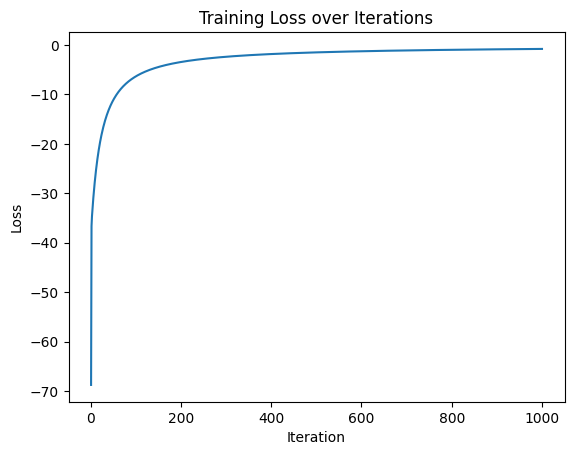

In [89]:
# Plot the loss vs. iteration
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over Iterations")
plt.show()

In [98]:
print(Theta1)

#############################################################
#########  Function to print the Decision Boundary  #########
#############################################################
def print_equation(Theta):
  terms = []
  for i, coef in enumerate(Theta1):
      term = f"({coef:.2f})*x{i+1}"
      terms.append(term)

  equation = " + ".join(terms).replace("+ -", "- ")
  print("Decision Boundary:")
  print(equation)
#############################################################
#########  Function to print the Decision Boundary  #########
#############################################################

print_equation(Theta1)
print("x1 = 1, the Bias Term")

tensor([ 0.6135,  0.4128,  1.8833, -2.5368, -2.2902], requires_grad=True)
Decision Boundary:
(0.61)*x1 + (0.41)*x2 + (1.88)*x3 + (-2.54)*x4 + (-2.29)*x5
x1 = 1, the Bias Term


In [91]:
##############################################################
#####  Prediction using Theta1 from Maximization Problem #####
##############################################################

y_pred_prob_1 = h(X_test, Theta1)
print(y_pred_prob_1)

tensor([0.9998, 0.9973, 0.9993, 0.0179, 0.0157, 0.0077, 0.0018, 0.9915, 0.0039,
        0.0050, 0.0059, 0.0195, 0.9981, 0.0011, 0.9978, 0.0043, 0.9988, 0.9995,
        0.0114, 0.0107], grad_fn=<MulBackward0>)


In [92]:
y_pred_1 = torch.tensor([1 if prob >= 0.5 else 0 for prob in y_pred_prob_1])
print(y_pred_1)

tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])


In [93]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_1 = accuracy_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)

print(f"Accuracy: {accuracy_1}")
print(f"F1 Score: {f1_1}")

Accuracy: 1.0
F1 Score: 1.0


## Negative Log Likelihood

In [94]:
##########  Creating Parameter Vector and Initializing randomly  #############
torch.manual_seed(42)
Theta2 = torch.randn(5, requires_grad=True)
print(Theta2.shape)

torch.Size([5])


In [95]:
##################################################################################################################
#################  This is the Training Loop for Negative Log Likelihood Function, Minimization  #################
##################################################################################################################

import matplotlib.pyplot as plt

loss_history = []

num_iterations = 1000
for i in range(num_iterations):
    # Forward pass: compute predictions and loss
    y_pred = h(X_train, Theta2)        # Model's prediction
    loss = Negative_log_likelihood_loss(X_train, Theta2, y_train) # loss function

    # Backward pass: compute gradients
    loss.backward()

    # Parameter update (gradient descent step)
    with torch.no_grad():   ### torch.no_grad() is to ensure that this step of updation is not included in the computation graph of Parameter variable Theta #########
        Theta2 -= lr * Theta2.grad  ####  Theta_j = Theta_j - learning_rate * Gradient_of_Obj_func

    # IMPORTANT: Zero the gradients after updating
    Theta2.grad.zero_()

    # Store the loss (convert from tensor to Python float)
    current_loss = loss.item()
    loss_history.append(current_loss)

    # Print the loss for each iteration
    print(f"Iteration {i+1}/{num_iterations}, Loss: {current_loss}")

Iteration 1/1000, Loss: 68.77510833740234
Iteration 2/1000, Loss: 36.64432907104492
Iteration 3/1000, Loss: 34.65696716308594
Iteration 4/1000, Loss: 33.33280563354492
Iteration 5/1000, Loss: 32.095176696777344
Iteration 6/1000, Loss: 30.933565139770508
Iteration 7/1000, Loss: 29.842105865478516
Iteration 8/1000, Loss: 28.815460205078125
Iteration 9/1000, Loss: 27.84874725341797
Iteration 10/1000, Loss: 26.937490463256836
Iteration 11/1000, Loss: 26.077577590942383
Iteration 12/1000, Loss: 25.2652530670166
Iteration 13/1000, Loss: 24.497074127197266
Iteration 14/1000, Loss: 23.769886016845703
Iteration 15/1000, Loss: 23.080793380737305
Iteration 16/1000, Loss: 22.427141189575195
Iteration 17/1000, Loss: 21.80649757385254
Iteration 18/1000, Loss: 21.21662139892578
Iteration 19/1000, Loss: 20.655460357666016
Iteration 20/1000, Loss: 20.12112045288086
Iteration 21/1000, Loss: 19.611860275268555
Iteration 22/1000, Loss: 19.12607765197754
Iteration 23/1000, Loss: 18.662288665771484
Iteratio

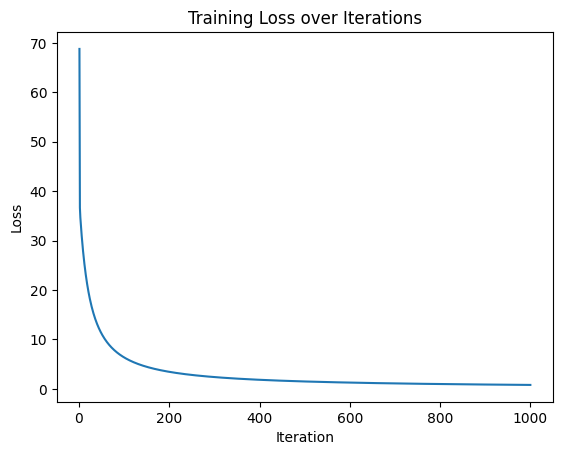

In [96]:
# Plot the loss vs. iteration
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over Iterations")
plt.show()

In [103]:
print(Theta2)
print_equation(Theta2)
print("x1 = 1, the Bias Term")

tensor([ 0.6135,  0.4128,  1.8833, -2.5368, -2.2902], requires_grad=True)
Decision Boundary:
(0.61)*x1 + (0.41)*x2 + (1.88)*x3 + (-2.54)*x4 + (-2.29)*x5
x1 = 1, the Bias Term


In [100]:
##############################################################
#####  Prediction using Theta2 from Minimization Problem #####
##############################################################

y_pred_prob_2 = h(X_test, Theta2)
print(y_pred_prob_2)

tensor([0.9998, 0.9973, 0.9993, 0.0179, 0.0157, 0.0077, 0.0018, 0.9915, 0.0039,
        0.0050, 0.0059, 0.0195, 0.9981, 0.0011, 0.9978, 0.0043, 0.9988, 0.9995,
        0.0114, 0.0107], grad_fn=<MulBackward0>)


In [101]:
###### Converting the Probability values to 0's and 1's ##########
y_pred_2 = torch.tensor([1 if prob >= 0.5 else 0 for prob in y_pred_prob_2])
print(y_pred_2)

tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])


In [102]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)

print(f"Accuracy: {accuracy_2}")
print(f"F1 Score: {f1_2}")

Accuracy: 1.0
F1 Score: 1.0
